In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf

## Ordinary Least Squares (All Variables)

In [2]:
df = pd.read_csv('StudentPerformanceFactorsCleaned.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Female,70


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Exam_Score'), df['Exam_Score'], test_size=0.2, random_state=42)

In [4]:
train_data = df.loc[X_train.index]

In [5]:
for col in ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality']:
        df[col] = pd.Categorical(df[col], categories=["Low", "Medium", "High"], ordered = True)

In [6]:
df['Peer_Influence'] = pd.Categorical(df['Peer_Influence'], categories=["Negative", "Neutral", "Positive"], ordered = True)    
df['Parental_Education_Level'] = pd.Categorical(df['Parental_Education_Level'], categories=["High School", "College", "Postgraduate"], ordered = True)

In [7]:
lm = smf.ols(formula='Exam_Score ~ Hours_Studied + Attendance + C(Parental_Involvement) + C(Access_to_Resources) + C(Extracurricular_Activities) + Sleep_Hours + Previous_Scores + C(Motivation_Level) + C(Internet_Access) + Tutoring_Sessions + C(Family_Income) + C(Teacher_Quality) + C(School_Type) + C(Peer_Influence) + Physical_Activity + C(Learning_Disabilities) + C(Parental_Education_Level) + C(Gender)', data=train_data)
lm = lm.fit()

In [8]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Exam_Score   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     476.6
Date:                Sun, 01 Dec 2024   Prob (F-statistic):               0.00
Time:                        07:42:52   Log-Likelihood:                -11267.
No. Observations:                5154   AIC:                         2.259e+04
Df Residuals:                    5128   BIC:                         2.276e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      42.6464      0.383    111.408      0.000      41.896      43.397
C(Parental_Involvement)[T.Low]                 -2.0458      0.088    -23.373      0.000      -2.217      -1.874
C(Parental_Involvement)[T.Medium]              -1.1077      0.070    -15.803      0.000      -1.245      -0.970
C(Access_to_Resources)[T.Low]                  -2.0935      0.087    -23.958      0.000      -2.265      -1.922
C(Access_to_Resources)[T.Medium]               -0.9934      0.070    -14.242      0.000      -1.130      -0.857
C(Extracurricular_Activities)[T.Yes]            0.5417      0.061      8.828      0.000       0.421       0.662
C(Motivation_Level)[T.Low]                     -0.9971      0.088    -11.366      0.000      -1.169      -0.825
C(Motivation_Level)[T.Medium]                  -0.4977      0.080     -6.260      0.000      -0.654      -0.342
C(Internet_Access)[T.Yes]                       0.8394      0.114      7.368      0.000       0.616       1.063
C(Family_Income)[T.Low]                        -1.0618      0.084    -12.699      0.000      -1.226      -0.898
C(Family_Income)[T.Medium]                     -0.5943      0.084     -7.115      0.000      -0.758      -0.431
C(Teacher_Quality)[T.Low]                      -1.0615      0.109     -9.720      0.000      -1.276      -0.847
C(Teacher_Quality)[T.Medium]                   -0.5528      0.068     -8.182      0.000      -0.685      -0.420
C(School_Type)[T.Public]                       -0.0138      0.065     -0.211      0.833      -0.142       0.114
C(Peer_Influence)[T.Neutral]                    0.4775      0.081      5.859      0.000       0.318       0.637
C(Peer_Influence)[T.Positive]                   1.0026      0.081     12.418      0.000       0.844       1.161
C(Learning_Disabilities)[T.Yes]                -0.9232      0.099     -9.309      0.000      -1.118      -0.729
C(Parental_Education_Level)[T.High School]     -0.4488      0.070     -6.448      0.000      -0.585      -0.312
C(Parental_Education_Level)[T.Postgraduate]     0.4966      0.087      5.725      0.000       0.327       0.667
C(Gender)[T.Male]                              -0.0534      0.061     -0.876      0.381      -0.173       0.066
Hours_Studied                                   0.2907      0.005     57.151      0.000       0.281       0.301
Attendance                                      0.1984      0.003     75.835      0.000       0.193       0.204
Sleep_Hours                                    -0.0084      0.020     -0.414      0.679      -0.048       0.032
Previous_Scores                                 0.0501      0.002     23.841      0.000       0.046       0.054
Tutoring_Sessions                               0.5217     

In [9]:
y_pred = lm.predict(X_test)

In [10]:
print(f"Test MSE: {mean_squared_error(y_pred, y_test)}")
print(f"Test R^2: {r2_score(y_pred, y_test)}")

Test MSE: 3.055902740333479
Test R^2: 0.731652725175234


## Regularization with LASSO

In [27]:
from sklearn.linear_model import Lasso, LassoCV
from feature_engineering import process_categorical_columns

In [12]:
df = pd.read_csv('StudentPerformanceFactorsCleaned.csv')

In [13]:
df = process_categorical_columns(df)

In [17]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities_Yes,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access_Yes,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type_Public,Peer_Influence,Physical_Activity,Learning_Disabilities_Yes,Parental_Education_Level,Gender_Male,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,1,2,3,0,0,1,67
1,19,64,0,1,0,8,59,0,1,2,1,1,1,0,4,0,1,0,61
2,24,98,1,1,1,7,91,1,1,2,1,1,1,1,4,0,2,1,74
3,29,89,0,1,1,8,98,1,1,1,1,1,1,0,4,0,0,1,71
4,19,92,1,1,1,6,65,1,1,3,1,2,1,1,4,0,1,0,70


In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Exam_Score'), df['Exam_Score'], test_size=0.2, random_state=42)

In [21]:
lasso = Lasso(alpha = 0.1, random_state=792)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, random_state=792)

In [22]:
y_pred_lasso = lasso.predict(X_test)

In [23]:
lasso.coef_

array([ 0.28789949,  0.19711966,  0.82267973,  0.81580034,  0.12959568,
       -0.        ,  0.04937036,  0.28780311,  0.        ,  0.45528207,
        0.33121594,  0.25144092, -0.        ,  0.34130065,  0.08512189,
       -0.        ,  0.30747381, -0.        ])

In [25]:
y_pred_lasso[0:10]

array([63.08101243, 69.06043079, 65.61560054, 68.71460375, 65.75666143,
       69.9291667 , 61.22457428, 65.46602683, 63.42280451, 68.14895095])

In [24]:
print(f"LASSO MSE: {mean_squared_error(y_pred_lasso, y_test)}")
print(f"LASSO R^2: {r2_score(y_pred_lasso, y_test)}")

LASSO MSE: 3.373830704627014
LASSO R^2: 0.668535565201632


This model has a slightly worse $R^2$ than the linear model, but it is much simpler. We will now use K-fold CV with a range of alpha values to try to find the variables that best model a students' final exam score.

In [29]:
lasso_cv = LassoCV(cv=5, random_state=265)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=5, random_state=265)

In [41]:
X_train.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities_Yes', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access_Yes',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality',
       'School_Type_Public', 'Peer_Influence', 'Physical_Activity',
       'Learning_Disabilities_Yes', 'Parental_Education_Level', 'Gender_Male'],
      dtype='object')

In [33]:
print(f"Best Alpha is {lasso_cv.alpha_}")
print(f"Best Coefficients are {lasso_cv.coef_}")

Best Alpha is 0.02576009930237171
Best Coefficients are [ 0.29006489  0.19811241  0.97778252  0.98364345  0.43399452 -0.
  0.04994589  0.44472207  0.46926061  0.5051152   0.47187735  0.4623301
 -0.          0.46221144  0.16370131 -0.64032656  0.42828825 -0.        ]


In [43]:
lasso_cv.coef_[[5, 12, 17]]

array([-0., -0., -0.])

In [44]:
X_train.columns[[5, 12, 17]]

Index(['Sleep_Hours', 'School_Type_Public', 'Gender_Male'], dtype='object')

In [34]:
y_pred_lasso_cv = lasso_cv.predict(X_test)

In [35]:
print(f"LASSO CV MSE: {mean_squared_error(y_pred_lasso_cv, y_test)}")
print(f"LASSO CV R^2: {r2_score(y_pred_lasso_cv, y_test)}")

LASSO CV MSE: 3.0795545158282076
LASSO CV R^2: 0.720229841504388


This model has a very low MSE and a high $R^2$. Although it is technically worse than the linear model with all variables, it allows us to remove 3 of the variables (Sleep Hours, School Type, and Gender) to make our model simpler. We may also want to remove Previous Scores from the model because it's coefficient (0.04994589) is very close to 0. Plus, it may be nice to be able to predict a student's final exam score without any previous knowledge about their testing abilities.

In [45]:
import matplotlib.pyplot as plt

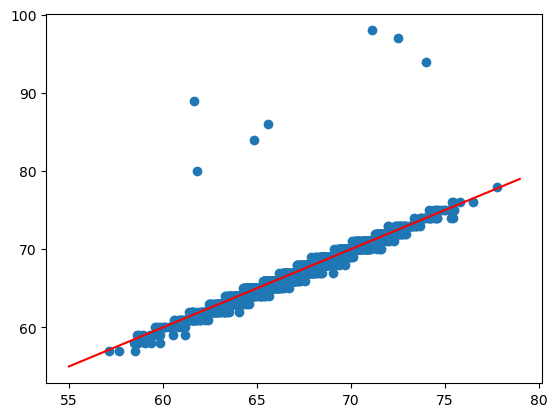

In [49]:
plt.scatter(y_pred_lasso_cv, y_test)
plt.plot(np.arange(55, 80, 1), np.arange(55, 80, 1), color='red')
plt.show()

TODO: FIT LINEAR MODEL AFTER REMOVING THE 4 VARIABLES MENTIONED ABOVE WITH STATSMODELS. CHECK VIF AND ENSURE NO MULTICOLINEARITY.